In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("insurance.csv")

In [2]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

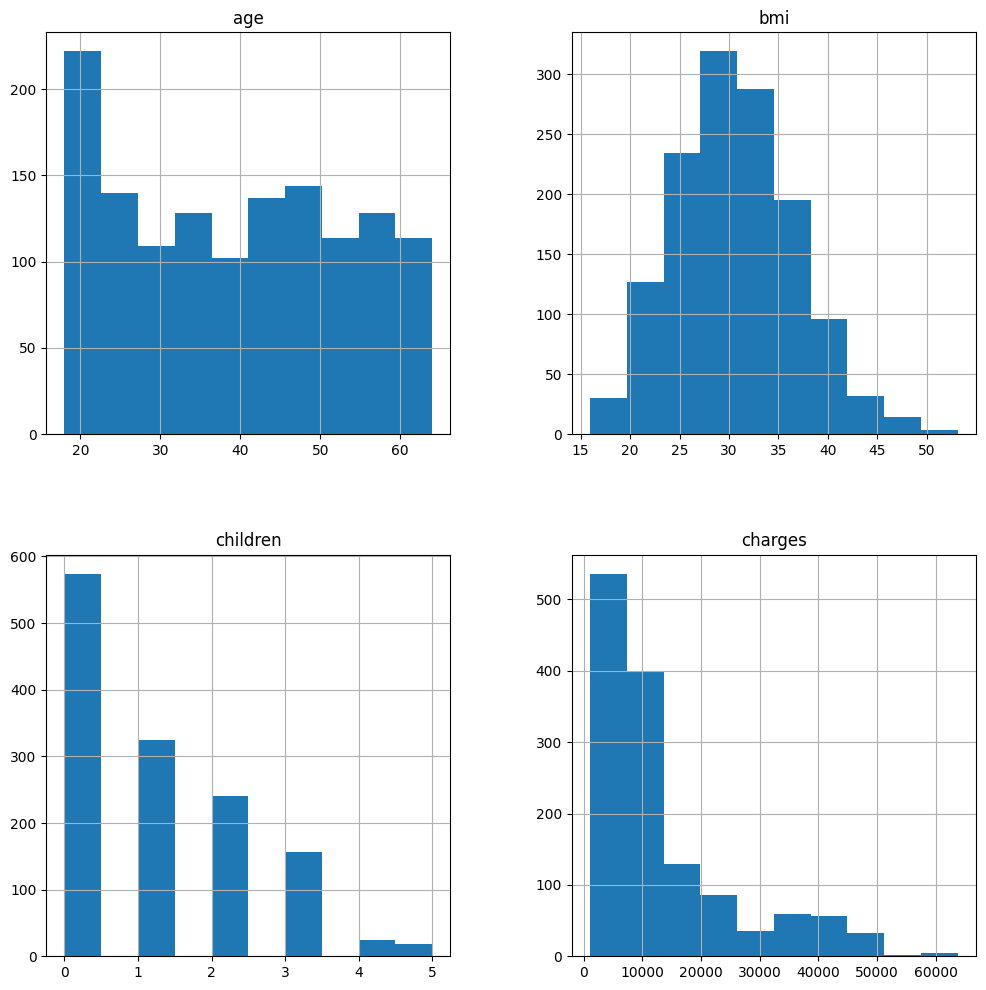

In [7]:
dataset.hist(figsize=(12,12))

In [13]:
label_encoder = LabelEncoder()

dataset['sex'] =  label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] =  label_encoder.fit_transform(dataset['smoker'])
dataset['region'] =  label_encoder.fit_transform(dataset['region'])
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
dataset.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [14]:
# Dividindo os dados em conjuntos de treinamento e teste
c = dataset[['charges']]  # Recurso (variável independente)
s = dataset['smoker']  # Rótulo (variável dependente)

c_train, c_test, s_train, s_test = train_test_split(c, s, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(c_train, s_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(c_test)

Erro Médio Quadrático: 0.053841629103752384
Erro Absoluto Médio: 0.15376924705795875
R² (coeficiente de determinação): 0.6653581543139571


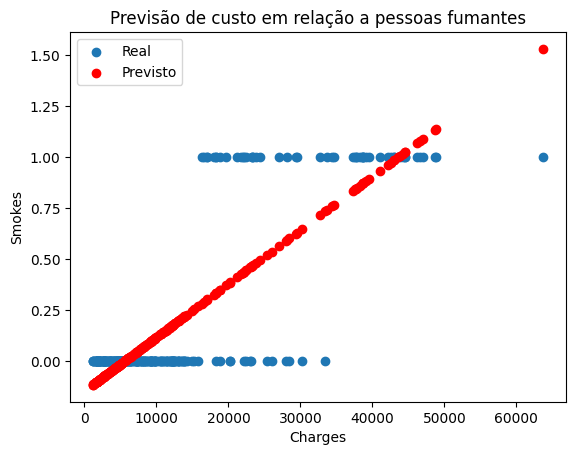

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

erro_medio_quadratico = mean_squared_error(s_test, previsoes)
erro_absoluto_medio = mean_absolute_error(s_test, previsoes)
r_quadrado = r2_score(s_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

# Visualizando as previsões
plt.scatter(c_test, s_test, label='Real')
plt.scatter(c_test, previsoes, label='Previsto', color='red')
plt.xlabel('Charges')
plt.ylabel('Smokes')
plt.title('Previsão de custo em relação a pessoas fumantes')
plt.legend()
plt.show()